In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# чтение обучающей выборки
data = pd.read_csv('abalone.data.csv')

In [6]:
data = data.fillna(5)
data.head()

,Sexnominal,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [7]:
pd.get_dummies(data.Sexnominal)

,F,I,M
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4171,1,0,0
4172,0,0,1
4173,0,0,1
4174,1,0,0


In [11]:
data.drop(['Sexnominal'], axis = 1, inplace = True)

In [12]:
data

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
data = data.fillna(1)
data.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [15]:
parts = np.split(data, [7,8], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Length  Diameter  Height   Whole  Shucked  Viscera  Shell
0   0.350     0.265   0.090  0.2255   0.0995   0.0485  0.070
1   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.210
2   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.155
3   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.055
4   0.425     0.300   0.095  0.3515   0.1410   0.0775  0.120 

Выходные данные:

    Rings
0    7.0
1    9.0
2   10.0
3    7.0
4    8.0


## Разделение выборки

In [16]:
 X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [17]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       Length  Diameter  Height  Whole  Shucked  Viscera   Shell
2821   0.450     0.335   0.105  0.362   0.1575   0.0795  0.1095
725    0.400     0.305   0.085  0.297   0.1080   0.0705  0.1000
3357   0.285     0.215   0.075  0.106   0.0415   0.0230  0.0350
1823   0.185     0.135   0.040  0.027   0.0105   0.0055  0.0090
58     0.505     0.400   0.125  0.583   0.2460   0.1300  0.1750 

Входные параметры тестовой выборки:

       Length  Diameter  Height   Whole  Shucked  Viscera  Shell
3455   0.610     0.480   0.160  1.2340   0.5980   0.2380  0.315
3103   0.660     0.525   0.200  1.4890   0.6065   0.3795  0.421
3066   0.650     0.505   0.170  1.5595   0.6950   0.3515  0.395
3195   0.325     0.245   0.075  0.1495   0.0605   0.0330  0.045
300    0.540     0.435   0.175  0.8920   0.3220   0.1740  0.335 

Выходные параметры обучающей выборки:

       Rings
2821    7.0
725    10.0
3357    5.0
1823    5.0
58      7.0 

Выходные параметры тестовой выборки:


In [18]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4050, 7)
(126, 7)
(4050, 1)
(126, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [21]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[10.3]
 [10.7]
 [10.1]
 [ 7.4]
 [13.2]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [22]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [23]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 1.9365079365079365
Средняя абсолютная ошибка для 5 ближайших соседей: 1.7650793650793648
Средняя абсолютная ошибка для 10 ближайших соседей: 1.6992063492063494


In [24]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 6.98015873015873
Средняя квадратичная ошибка для 5 ближайших соседей: 5.337142857142857
Средняя квадратичная ошибка для 10 ближайших соседей: 5.281507936507937


In [29]:
# Оценка коэффициента детерминации

print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.43481764444875115
Коэффициент детерминации для 5 ближайших соседей: 0.5678523815109677
Коэффициент детерминации для 10 ближайших соседей: 0.5723571322925644


In [30]:
## Grid Search (решетчатый поиск)

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [32]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [33]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=15)

Лучшее число ближайших соседей:

 {'n_neighbors': 15}

Лучшее значение средней квадратичной ошибки:

 -4.583852949245541


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



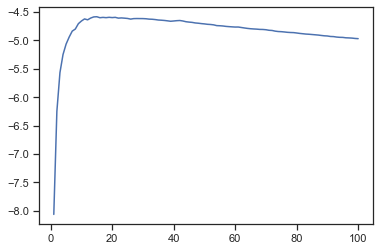

In [34]:
 print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=15)

Лучшее число ближайших соседей:

 {'n_neighbors': 15}

Лучшее значение коэффициента детерминации:

 0.5548851426149294

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



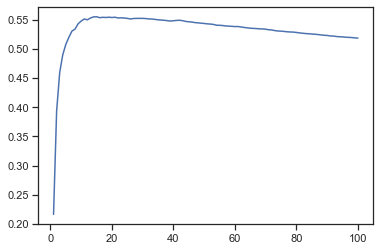

In [35]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [36]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [0.40260983 0.32595291 0.51385093 0.55262206 0.52130378] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.2699617050675428 

- 5 ближайших соседей: 0.4224852045608996 

- 10 ближайших соседей: 0.4632679006447069 

- 50 ближайших соседей: 0.45877155500386363 

- 100 ближайших соседей: 0.4196452418589491 



In [ ]:
# The end.